## Importing required libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import string
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import re
from unidecode import unidecode
from nltk import corpus

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Analysis

In [336]:
df = pd.read_csv("Dataset.csv",encoding= 'unicode_escape')

In [337]:
df.head()

,recipe_name,category,description,details,ingredients,instructions,image_url,recipe_url
0,Chewy Chocolate Chip Cookies,Cookie,"['Pinned over 3 million times, these super soft and chewy chocolate chip cookies are the most popular cookie recipe on my website. Melted butter, 1 extra egg yolk, and more brown sugar than white sugar guarantee the chewiest chocolate chip cookie texture. Chilling the cookie dough is imperative....","['Author: Sally', 'Prep Time: 10 minutes', 'Cook Time: 12 minutes', 'Total Time: 3 hours, 22 minutes', 'Yield: 16 large cookies 1x', 'Category: Dessert', 'Method: Baking', 'Cuisine: American']","['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...",https://cdn.sallysbakingaddiction.com/wp-content/uploads/2013/05/chocolate-chunk-cookies.jpg,https://sallysbakingaddiction.com/chewy-chocolate-chip-cookies/
1,The Best Sugar Cookies,Cookie,"['With crisp edges, thick centers, and room for lots of decorating icing, I know youâll love these soft sugar cookies as much as I do. The number of cookies this recipe yields depends on the size of the cookie cutter you use. If youâd like to make dozens of cookies for a large crowd, double ...","['Author: Sally', 'Prep Time: 2 hours', 'Cook Time: 12 minutes', 'Total Time: 4 hours', 'Yield: 24 3-4 inch cookies 1x', 'Category: Cookies', 'Method: Baking', 'Cuisine: American']","['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...",https://cdn.sallysbakingaddiction.com/wp-content/uploads/2014/05/cookie-cutter-sugar-cookies.jpg,https://sallysbakingaddiction.com/best-sugar-cookies/
2,Dark Chocolate Chunk Oatmeal Cookies,Cookie,"['Soft and chewy with slightly crisp edges, these oatmeal cookies are full of flavor and exploding with melty dark chocolate. Chill the dough for at least 30 minutes in the refrigerator before baking.']","['Author: Sally', 'Prep Time: 45 minutes', 'Cook Time: 12 minutes', 'Total Time: 1 hour', 'Yield: 3 dozen 1x', 'Category: Cookies', 'Method: Baking', 'Cuisine: American']","['1 cup (230g) unsalted butter, softened toroom temperature', '1 cup (200g) packed light or dark brown sugar', '1/4 cup (50g) granulated sugar', '2 large eggs, at room temperature', '1 Tablespoon pure vanilla extract (yes, Tablespoon!)', '1 Tablespoon molasses', '1 and 1/2 cups (188g) all-purpos...","['Step 1:Using a hand mixer or a stand mixer fitted with paddle attachment, cream the softened butter and both sugars together on medium speed until smooth, about 2 minutes. Add the eggs and mix on high until combined, about 1 minute. Scrape down the sides and bottom of the bowl as needed. Add t...",https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/04/dark-chocolate-chunk-oatmeal-cookies-5.jpg,https://sallysbakingaddiction.com/dark-chocolate-chunk-oatmeal-cookies/
3,Homemade Butter Cookies,Cookie,"['Using just 8 basic ingredients and a large piping tip, make these soft vanilla almond flavored butte

In [338]:
df.shape

(2107, 8)

## Removing null and duplicate values

In [339]:
df.isnull().sum()

recipe_name      0
category         0
description     41
details          1
ingredients      1
instructions     1
image_url        2
recipe_url       2
dtype: int64

In [340]:
df[df['image_url'].isnull()]

,recipe_name,category,description,details,ingredients,instructions,image_url,recipe_url
1006,Gobble-oink pie,Pie_Crisp_Tart,['âGobble-oink pie is a great way to get the kids involved in the kitchen â,NaN,NaN,NaN,NaN,NaN
1007,create pie perfection for all the family using leftovers from your fridge. â'],"['Serves 6 Cooks In1 hour 30 minutes DifficultyNot too tricky', 'Serves 6', 'Cooks In1 hour 30 minutes', 'DifficultyNot too tricky']","['1 small swede', '2 sweet potatoes', '1 knob of unsalted butter', '2 carrots', '1 stick of celery', '1 medium onion', '2 cloves of garlic', 'olive oil', '500 g higher-welfare turkey mince (or leftover cooked higher-welfare turkey)', '50 g higher-welfare ham', '500 ml organic chicken or vegetabl...","['Step 1: Preheat the oven to 180ÂºC/350ÂºF/gas 4. ', 'Step 2: Peel and roughly chop the swede and sweet potatoes, then boil in a pan of water for 20 minutes, or until soft. Drain and leave to steam dry, then mash with butter and set aside.', 'Step 3: Finely chop the carrot and celery, then peel...","https://img.jamieoliver.com/jamieoliver/recipe-database/46455436.jpg?tr=w-800,h-1066",https://www.jamieoliver.com/recipes/turkey-recipes/gobble-oink-pie/,NaN,NaN


In [341]:
df.drop_duplicates(subset = 'recipe_name',keep='first', inplace=True)

In [342]:
df.shape

(1998, 8)

In [343]:
df = df.dropna(axis=0)

In [344]:
df.isnull().sum()

recipe_name     0
category        0
description     0
details         0
ingredients     0
instructions    0
image_url       0
recipe_url      0
dtype: int64

In [345]:
df.shape

(1958, 8)

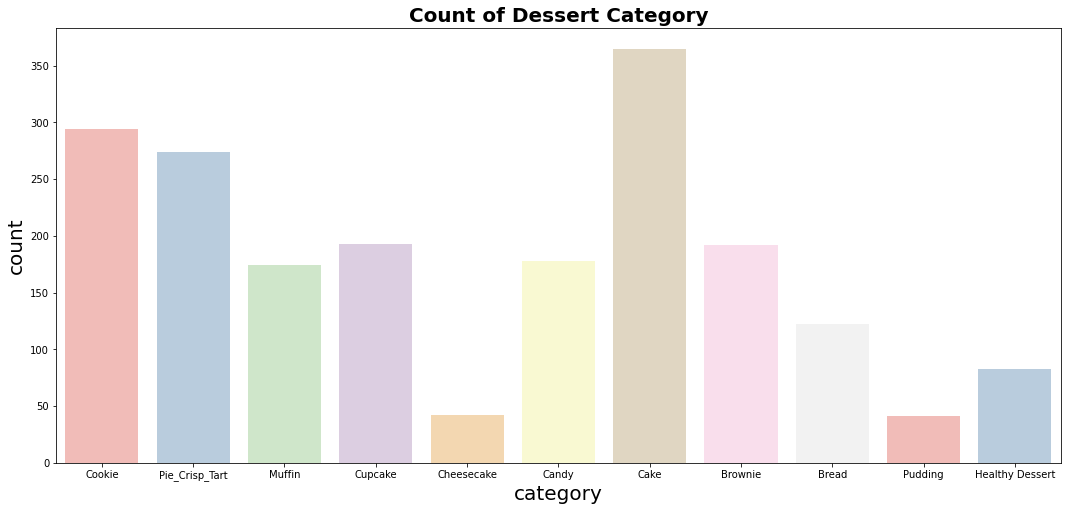

In [346]:
#Data Visualization
plt.figure(figsize=(18, 8))
plt.title("Count of Dessert Category",size='20',weight='bold')
plt.xlabel("",size='20')
plt.ylabel("",size='20')
sns.countplot(df.category,palette='Pastel1');

## Data Cleaning - Model 1

In [347]:
model1 = df[['recipe_name','category','description','ingredients']]

In [348]:
model1_clean = pd.DataFrame(columns = ['recipe_name','category','description','ingredients'])

In [349]:
model1_clean['recipe_name'] = model1['recipe_name']

In [350]:
import string
from nltk.corpus import stopwords
import re
def clean_ingredients(x):
    x = re.sub(r"\\xa0",' ',x)
    x = re.sub(r'\\n', ' ', x)
    x = re.sub(r'â\x80\x93', ' ', x)
    x = re.sub(r'â\x80\x99'," ",x)
    x = re.sub(r'[0-9]+', ' ', x)
    #x = ''.join([char for char in x if char not in string.punctuation])
    x = re.sub(r'\b\w{1,2}\b', ' ', x)
    x = re.sub(r'°',' ',x)
    x = x.lower()
    return x.strip()
    

In [351]:
model1_clean['ingredients'] = model1['ingredients'].apply(clean_ingredients)

In [352]:
model1_clean

,recipe_name,category,description,ingredients
0,Chewy Chocolate Chip Cookies,NaN,NaN,"[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l..."
1,The Best Sugar Cookies,NaN,NaN,"[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu..."
2,Dark Chocolate Chunk Oatmeal Cookies,NaN,NaN,"[' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose flour(s..."
3,Homemade Butter Cookies,NaN,NaN,"[' cup ( sticks; ) unsalted butter, softened room temperature', ' / cup ( ) granulated sugar', ' and / teaspoons pure vanilla extract', ' teaspoon almond extract', ' large egg, room temperature', ' and / cups ( ) all-purpose flour(spoon & leveled)', ' / teaspoon salt', ' ..."
4,Chewy Oatmeal Chocolate Chip Cookies,NaN,NaN,"[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon ground cinnamon (optional)', ' teaspoon baking soda', ' teaspoon salt', ' cup ( sticks; ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' ..."
...,...,...,...,...
2102,Easy Strawberry Lemonade Freezer Pie,NaN,NaN,"[' container ( . ounces) frozen sweetened sliced strawberries, thawed ( - / cups thawed)', ' package ( . ounces) instant lemon pudding mix', ' carton ( ounces) frozen whipped topping, thawed', ' graham cracker crust ( inches)', 'optional: additional whipped topping and fresh strawberries']"
2103,Toffee Cream Pie,NaN,NaN,"[' - / cups half-and-half cream', ' package ( . ounces) instant vanilla pudding mix', ' heath candy bars ( . ounces each), chopped', ' carton ( ounces) frozen whipped topping, thawed, divided', ' chocolate crumb crust ( inches)']"
2104,Almond Pear Tart,NaN,NaN,"['pastry for single-crust pie ( inches)', ' / cup plus teaspoons sugar, divided', ' tablespoons all-purpose flour', ' cups sliced peeled fresh pears (about medium)', ' tablespoons sliced almonds']"
2105,Arctic Orange Pie,NaN,NaN,"[' package ( ounces) fat-free cream cheese', ' can ( ounces) frozen orange juice concentrate, thawed', ' carton ( ounces) frozen reduced-fat whipped topping, thawed', ' reduced-fat graham cracker crust ( inches)', ' can ( ounces) mandarin oranges, drained']"


In [353]:
def clean_category(x):
    x = x.lower()
    return x

In [354]:
model1_clean['category'] = model1['category'].apply(clean_category)

In [355]:
model1_clean['description'] = model1['description'].apply(clean_category)

In [356]:
def clean_description(x):
    x = x.lower()
    x = re.sub(r"â\x80\x99",'',x)
    x = re.sub(r'[0-9]+', ' ', x)
    x = re.sub(r"\x80\x9c",'',x)
    x = re.sub(r"â",'',x)
    x = re.sub(r"\x80\x9d",'',x)
    x = re.sub(r"\x80\x94",'',x)
    x = ''.join([char for char in x if char not in string.punctuation])
    x = re.sub(r'\b\w{1,2}\b', '', x)
    return x

In [357]:
model1_clean['description'] = model1['description'].apply(clean_description)

In [358]:
model1_clean['tags'] = model1_clean['category'] + ' ' + model1_clean['ingredients'] + ' ' + model1_clean['description']

In [359]:
model1_clean

,recipe_name,category,description,ingredients,tags
0,Chewy Chocolate Chip Cookies,cookie,pinned over million times these super soft and chewy chocolate chip cookies are the most popular cookie recipe website melted butter extra egg yolk and more brown sugar than white sugar guarantee the chewiest chocolate chip cookie texture chilling the cookie dough imperative mixer required,"[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l...","cookie [' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar..."
1,The Best Sugar Cookies,cookie,with crisp edges thick centers and room for lots decorating icing know youll love these soft sugar cookies much the number cookies this recipe yields depends the size the cookie cutter you use youd like make dozens cookies for large crowd double the recipe,"[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu...","cookie [' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room te..."
2,Dark Chocolate Chunk Oatmeal Cookies,cookie,soft and chewy with slightly crisp edges these oatmeal cookies are full flavor and exploding with melty dark chocolate chill the dough for least minutes the refrigerator before baking,"[' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose flour(s...","cookie [' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose ..."
3,Homemade Butter Cookies,cookie,using just basic ingredients and large piping tip make these soft vanilla almond flavored butter cookies theres leavening the texture close shortbread cookies recommend chilling the piped cookies for least minutes before baking,"[' cup ( sticks; ) unsalted butter, softened room temperature', ' / cup ( ) granulated sugar', ' and / teaspoons pure vanilla extract', ' teaspoon almond extract', ' large egg, room temperature', ' and / cups ( ) all-purpose flour(spoon & leveled)', ' / teaspoon salt', ' ...","cookie [' cup ( sticks; ) unsalted butter, softened room temperature', ' / cup ( ) granulated sugar', ' and / teaspoons pure vanilla extract', ' teaspoon almond extract', ' large egg, room temperature', ' and / cups ( ) all-purpose flour(spoon & leveled)', ' / teaspoon salt',..."
4,Chewy Oatmeal Chocolate Chip Cookies,cookie,with oats butter and mostly all brown sugar you are guaranteed soft and chewy oatmeal cookie use this perfect oatmeal cookie the base for other addins such raisins dried cranberries and nuts cinnamon and touch molasses add that little something extra these are the best oatmeal chocolate chi...,"[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon ground cinnamon (optional)', ' teaspoon baking soda', ' teaspoon salt', ' cup ( sticks; ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown suga

In [360]:
training_df = pd.DataFrame(columns = ['recipe_name','tags'])

In [361]:
training_df['recipe_name'] = model1_clean['recipe_name']
training_df['tags'] = model1_clean['tags']

In [362]:
pd.set_option('display.max_colwidth', 300)
training_df.reset_index(inplace = True)
training_df

,index,recipe_name,tags
0,0,Chewy Chocolate Chip Cookies,"cookie [' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar..."
1,1,The Best Sugar Cookies,"cookie [' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room te..."
2,2,Dark Chocolate Chunk Oatmeal Cookies,"cookie [' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose ..."
3,3,Homemade Butter Cookies,"cookie [' cup ( sticks; ) unsalted butter, softened room temperature', ' / cup ( ) granulated sugar', ' and / teaspoons pure vanilla extract', ' teaspoon almond extract', ' large egg, room temperature', ' and / cups ( ) all-purpose flour(spoon & leveled)', ' / teaspoon salt',..."
4,4,Chewy Oatmeal Chocolate Chip Cookies,"cookie [' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon ground cinnamon (optional)', ' teaspoon baking soda', ' teaspoon salt', ' cup ( sticks; ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated suga..."
...,...,...,...
1953,2102,Easy Strawberry Lemonade Freezer Pie,"pie_crisp_tart [' container ( . ounces) frozen sweetened sliced strawberries, thawed ( - / cups thawed)', ' package ( . ounces) instant lemon pudding mix', ' carton ( ounces) frozen whipped topping, thawed', ' graham cracker crust ( inches)', 'optional: additional whipped topping and fr..."
1954,2103,Toffee Cream Pie,"pie_crisp_tart [' - / cups half-and-half cream', ' package ( . ounces) instant vanilla pudding mix', ' heath candy bars ( . ounces each), chopped', ' carton ( ounces) frozen whipped topping, thawed, divided', ' chocolate crumb crust ( inches)'] frozen desserts are ideal for party hosts ..."
1955,2104,Almond Pear Tart,"pie_crisp_tart ['pastry for single-crust pie ( inches)', ' / cup plus teaspoons sugar, divided', ' tablespoons all-purpose flour', ' cups sliced peeled fresh pears (about medium)', ' tablespoons sliced almonds'] had never seen pie without pan until daughter brought back this wonderf..."
1956,2105,Arctic Orange Pie,"pie_crisp_tart [' package ( ounces) fat-free cream cheese', ' can ( ounces) frozen orange juice concentrate, thawed', ' carton ( ounces) frozen reduced-fat whipped topping, thawed', ' reduced-fat graham cracker crust ( inches)', ' can ( ounces) mandarin oranges, drained'] this frosty o..."


### Removing Stop Words

In [363]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize

In [364]:
training_df['tags1'] = training_df['tags'].apply(lambda tok: word_tokenize(tok))

In [365]:
def word_lem(t):
    lt = [WordNetLemmatizer().lemmatize(i) for i in t]
    return lt
training_df['tags2'] = training_df['tags1'].apply(lambda l: word_lem(l))

In [366]:
def word_rem(t):
    measures = ['teaspoon', 'tablespoon', 'cup','ounce','optional','spoon','leveled','inch','additional','stick','room','plus','needed','rolling','work','surface','room','temperature','toroom']
    lt = [i for i in t if i not in measures]
    return lt
training_df['tags3'] = training_df['tags2'].apply(lambda l: word_rem(l))

In [367]:
import string
def remove_punct(text):
    df = [char for char in text if char not in string.punctuation]
    return df
training_df['tags4'] = training_df['tags3'].apply(lambda x: remove_punct(x))

In [368]:
training_df['tags5'] = training_df['tags4'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))

In [369]:
training_df['tags6'] = training_df['tags5'].apply(lambda x: ''.join([word for word in x if word not in string.punctuation]))

In [370]:
training_df

,index,recipe_name,tags,tags1,tags2,tags3,tags4,tags5,tags6
0,0,Chewy Chocolate Chip Cookies,"cookie [' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar...","[cookie, [, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoons, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, ...","[cookie, [, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoon, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, lig...","[cookie, [, ', and, /, (, ), all-purpose, flour, (, &, ), ', ,, ', baking, soda, ', ,, ', and, /, cornstarch, ', ,, ', /, salt, ', ,, ', /, (, ., ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, (, ), packed, light, dark, brown, sugar, ', ,, ', /, (, ), granulated, sugar, ', ,, '...","[cookie, and, all-purpose, flour, baking, soda, and, cornstarch, salt, unsalted, butter, melted, slightly, cooled, packed, light, dark, brown, sugar, granulated, sugar, large, egg, egg, yolk, pure, vanilla, extract, and, semi-sweet, chocolate, chip, chocolate, chunk, pinned, over, million, time,...",cookie all-purpose flour baking soda cornstarch salt unsalted butter melted slightly cooled packed light dark brown sugar granulated sugar large egg egg yolk pure vanilla extract semi-sweet chocolate chip chocolate chunk pinned million time super soft chewy chocolate chip cooky popular cookie re...,cookie allpurpose flour baking soda cornstarch salt unsalted butter melted slightly cooled packed light dark brown sugar granulated sugar large egg egg yolk pure vanilla extract semisweet chocolate chip chocolate chunk pinned million time super soft chewy chocolate chip cooky popular cookie reci...
1,1,The Best Sugar Cookies,"cookie [' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room te...","[cookie, [, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, '...","[cookie, [, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', ...","[cookie, [, ', and, /, (, ), all-purpose, flour, (, &, ), ,, more, for, and, ', ,, ', /, baking, powder, ', ,, ', /, salt, ', ,, ', /, (, ., ), unsalted, butter, ,, softened, ', ,, ', /, (, ), granulated, sugar, ', ,, ', large, egg, ,, ', ,, ', pure, vanilla, extract, ', ,, ', /, /, almond, extr...","[cookie, and, all-purpose, flour, more, for, and, baking, powder, salt, unsalted, butter, softened, granulated, sugar, large, egg, pure, vanilla, extract, almond, extract, but, make, the, flavor, outstanding, 'royal, icing, easy, glaze, icing, with, crisp, edge, thick, center, and, for, lot, dec...",cookie all-purpose flour baking powder salt unsalted butter softened granulated sugar large egg pure vanilla extract almond extract make flavor outstanding 'royal icing easy glaze icing crisp edge thick center lot decorating icing know youll love soft sugar cooky much number cooky recipe yield d...,

In [371]:
training_df.to_csv("cleaned_data.csv")

In [4]:
data_frame = pd.DataFrame(columns = ['recipe_name','tags'])

In [1]:
import pandas as pd

In [7]:
training_df = pd.read_csv("cleaned_data.csv",encoding= 'unicode_escape')

In [8]:
data_frame['recipe_name'] = training_df['recipe_name']
data_frame['tags'] = training_df['tags6']

In [9]:
data_frame

,recipe_name,tags
0,Chewy Chocolate Chip Cookies,cookie allpurpose flour baking soda cornstarch...
1,The Best Sugar Cookies,cookie allpurpose flour baking powder salt uns...
2,Dark Chocolate Chunk Oatmeal Cookies,cookie unsalted butter softened packed light d...
3,Homemade Butter Cookies,cookie unsalted butter softened granulated sug...
4,Chewy Oatmeal Chocolate Chip Cookies,cookie allpurpose flour ground cinnamon baking...
...,...,...
1946,Creamy Hazelnut Pie,piecrisptart package cream cheese softened co...
1947,Maple Syrup Pie,piecrisptart cornstarch water real maple syrup...
1948,Blueberry Pie with Graham Cracker Crust,piecrisptart sugar cornstarch salt water fresh...
1949,Fresh Blackberry Pie,piecrisptart sugar quickcooking tapioca salt f...


### Recommender using CountVectorizer - cosine similarity

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
cv = CountVectorizer()
vector = cv.fit_transform(data_frame['tags']).toarray()
similarity1 = cosine_similarity(vector)

In [375]:
def recommend(dessert):
    names = []
    index = data_frame[data_frame['recipe_name'] == dessert].index[0]
    distances = sorted(list(enumerate(similarity1[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:10]:
        names.append(data_frame.iloc[i[0]].recipe_name)
    return names


In [376]:
recommend('Glazed Orange Poppy Seed Bars')

['Glazed Orange Bundt Cake',
 'Cranberry Orange Spice Cake',
 'Cranberry Orange Bundt Cake',
 'Cranberry Orange Muffins',
 'Orange Salted Honey Cake',
 'Orange Lemon Poppy Seed Muffins',
 'Fresh-Squeezed Mimosa Cupcakes',
 'Chocolate Orange Shortbread Cookies',
 'Orange Dream Mini Cupcakes']

In [377]:
import pickle
with open('Model1_countvect.pickle','wb') as f:
    pickle.dump(similarity1,f)

In [378]:
headlines = []
for i in data_frame['tags']:
    headlines.append(i)
        

In [379]:
labels = [headline[:20] for headline in headlines]

def create_heatmap(similarity, cmap = "YlGnBu"):
    df = pd.DataFrame(similarity1)
    df.columns = labels
    df.index = labels
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df, cmap=cmap)

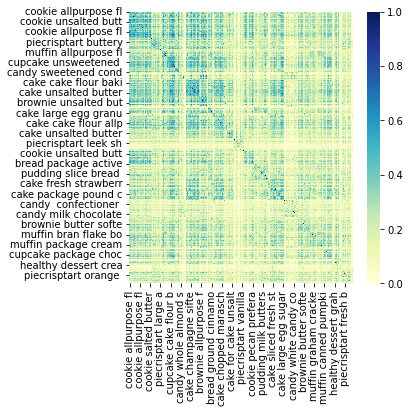

In [380]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_frame['tags'])
arr = X.toarray()
create_heatmap(cosine_similarity(arr))

### Recommender using TfidfVectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
similarity = pickle.load(open('Model1.pickle', 'rb'))
model1_df = pickle.load(open('Model1df.pickle', 'rb'))

In [6]:
tf = TfidfVectorizer()
vector = tf.fit_transform(data_frame['tags']).toarray()
similarity2 = cosine_similarity(vector)    


NameError: name 'data_frame' is not defined

In [78]:
def recommend2(dessert):
    index = model1_df[model1_df['recipe_name'] == dessert].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:10]:
        print(model1_df.iloc[i[0]].recipe_name)
        #print(model1_df['image_url'][i])

In [94]:
def reco(dessert):
    dessert = str(dessert)
    names = []
    images =[]
    index = model1_df[model1_df['recipe_name'] == dessert].index[0]
    image = model1_df['image_url'][index]
    category = model1_df['category'][index]
    detail = model1_df['details'][index]
    ingred = model1_df['ingredients'][index]
    instruc = model1_df['instructions'][index]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        names.append(model1_df.iloc[i[0]].recipe_name)
        images.append(model1_df.iloc[i[0]].image_url)
    print(names)

In [14]:
model1_df.to_csv("checkdata.csv")

In [95]:
reco('Chewy Chocolate Chip Cookies')

['Soft and Chewy Chocolate Chip Cookie Bars', 'Chewy Brown Sugar Cookies', 'Brown Butter Chocolate Chip Cookies', '6 Giant Chocolate Chip Cookies', 'Toasted Smore Chocolate Chip Cookies']


In [93]:
reco('Chewy Chocolate Chip Cookies')

['https://cdn.sallysbakingaddiction.com/wp-content/uploads/2016/03/chocolate-chip-cookie-bars.jpg', 'https://cdn.sallysbakingaddiction.com/wp-content/uploads/2013/12/chewy-brown-sugar-cookies-3.jpg', 'https://cdn.sallysbakingaddiction.com/wp-content/uploads/2014/12/Sallys-Baking-Addiction-Brown-Butter-Chocolate-Chip-Cookies.jpg', 'https://cdn.sallysbakingaddiction.com/wp-content/uploads/2019/05/6-chocolate-chip-cookies.jpg', 'https://cdn.sallysbakingaddiction.com/wp-content/uploads/2015/10/toasted-smores-cookies-recipe.jpg']


In [21]:
index = model1_df[model1_df['recipe_name'] == 'Chewy Chocolate Chip Cookies'].index[0]

In [22]:
print(index)

0


In [27]:
model1_df['category'][index]

'Cookie'

In [30]:
model1_df['details'][index]

'Author: Sally, Prep Time: 10 minutes,Cook Time: 12 minutes,Total Time: 3 hours, 22 minutes, Yield: 16 large cookies'

In [31]:
model1_df['ingredients'][index]

'2 and 1/4 cups (280g) all-purpose flour(spoon & leveled), 1 teaspoon baking soda, 1 and 1/2 teaspoons cornstarch, 1/2 teaspoon salt, 3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled, 3/4 cup (150g) packed light or dark brown sugar, 1/2 cup (100g) granulated sugar, 1 large egg + 1 egg yolk, at room temperature, 2 teaspoons pure vanilla extract, 1 and 1/4 cups (225g) semi-sweet chocolate chips or chocolate chunks'

In [32]:
model1_df['instructions'][index]

'Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside., Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla extract. Pour the wet ingredients into the dry ingredients and mix together with a large spoon or rubber spatula. The dough will be very soft, yet thick. Fold in the chocolate chunks. They may not stick to the dough because of the melted butter, but do your best to combine them. Cover the dough and chill in the refrigerator for 2-3 hours or up to 3-4 days. Chilling is mandatory. I highly recommend chilling the cookie dough overnight for less spreading. (Some readers have asked if its possible to roll into balls and then chill, but I dont recommend it. The cookie dough is quite sticky and loose to section into balls before chilling.), Step 3:Take the dough out of the refrigerator and allow to slightl

In [96]:
import pandas as pd
model1_df = pd.read_csv("Dataset_new.csv",encoding= 'unicode_escape')

In [63]:
model1_df=model1_df.rename(columns={'Unnamed: 0': 'number'})

In [97]:
model1_df

,Unnamed: 0,recipe_name,category,details,ingredients,instructions,image_url
0,0,Chewy Chocolate Chip Cookies,Cookie,"Prep Time: 10 minutes,Cook Time: 12 minutes,To...",2 and 1/4 cups (280g) all-purpose flour\n1 tea...,"1: Whisk the flour, baking soda, cornstarch, a...",https://cdn.sallysbakingaddiction.com/wp-conte...
1,1,The Best Sugar Cookies,Cookie,"Prep Time: 2 hours,Cook Time: 12 minutes,Total...",2 and 1/4 cups (281g) all-purpose flour\n1/2 t...,"1:Whisk the flour, baking powder, and salt tog...",https://cdn.sallysbakingaddiction.com/wp-conte...
2,2,Dark Chocolate Chunk Oatmeal Cookies,Cookie,"Prep Time: 45 minutes,Cook Time: 12 minutes,To...",1 cup (230g) unsalted butter\n1 cup (200g) pac...,1:Using a hand mixer or a stand mixer fitted w...,https://cdn.sallysbakingaddiction.com/wp-conte...
3,3,Homemade Butter Cookies,Cookie,"Prep Time: 20 minutes,Cook Time: 14 minutes,To...",1 cup (2 sticks; 230g) unsalted butter\nsoften...,1:Read through the recipe and recipe notes bef...,https://cdn.sallysbakingaddiction.com/wp-conte...
4,4,Chewy Oatmeal Chocolate Chip Cookies,Cookie,"Prep Time: 1 hour, 10 minutes,Cook Time: 14 mi...",1 and 1/2 cups (188g) all-purpose flour\n1 tea...,"Step 1:Whisk the flour, cinnamon, baking soda,...",https://cdn.sallysbakingaddiction.com/wp-conte...
...,...,...,...,...,...,...,...
1946,1947,Easy Strawberry Lemonade Freezer Pie,Pie_Crisp_Tart,"Total Time: Prep: 15 min. + freezing, Makes:8 ...",1 container (23.2 ounces) frozen sweetened sli...,"Step 1: In a large bowl, combine strawberries ...",https://www.tasteofhome.com/wp-content/uploads...
1947,1948,Toffee Cream Pie,Pie_Crisp_Tart,"Total Time: Prep: 15 min. + freezing, Makes:8 ...",1-1/2 cups half-and-half cream\n1 package (3.4...,"Step 1: In a large bowl, whisk cream and puddi...",https://www.tasteofhome.com/wp-content/uploads...
1948,1949,Almond Pear Tart,Pie_Crisp_Tart,Total Time: Prep: 15 min. Bake: 20 min. + cool...,Pastry for single-crust pie (9 inches)\n3/4 cu...,"Step 1: On a lightly floured surface, roll dou...",https://www.tasteofhome.com/wp-content/uploads...
1949,1950,Arctic Orange Pie,Pie_Crisp_Tart,"Total Time: Prep: 20 min. + freezing, Makes:8 ...",1 package (8 ounces) fat-free cream cheese\n1 ...,"Step 1: In a large bowl, beat cream cheese and...",https://www.tasteofhome.com/wp-content/uploads...


In [20]:
import pickle
with open('Model1.pickle','wb') as f:
    pickle.dump(similarity2,f)

In [103]:
import pickle
with open('Model1dfnew.pickle','wb') as f:
    pickle.dump(df,f)

In [33]:
import re
data = "Mothers%20Day%20rhubarb%20and%20ginger%20muffins"
data = re.sub(r"%20",' ',data)
print(data)

Mothers Day rhubarb and ginger muffins


In [34]:
import pandas as pd

In [100]:
df = pd.read_csv("Dataset_new.csv",encoding= 'unicode_escape')

In [101]:
df

,Unnamed: 0,recipe_name,category,details,ingredients,instructions,image_url
0,0,Chewy Chocolate Chip Cookies,Cookie,"Prep Time: 10 minutes,Cook Time: 12 minutes,To...",2 and 1/4 cups (280g) all-purpose flour\n1 tea...,"1: Whisk the flour, baking soda, cornstarch, a...",https://cdn.sallysbakingaddiction.com/wp-conte...
1,1,The Best Sugar Cookies,Cookie,"Prep Time: 2 hours,Cook Time: 12 minutes,Total...",2 and 1/4 cups (281g) all-purpose flour\n1/2 t...,"1:Whisk the flour, baking powder, and salt tog...",https://cdn.sallysbakingaddiction.com/wp-conte...
2,2,Dark Chocolate Chunk Oatmeal Cookies,Cookie,"Prep Time: 45 minutes,Cook Time: 12 minutes,To...",1 cup (230g) unsalted butter\n1 cup (200g) pac...,1:Using a hand mixer or a stand mixer fitted w...,https://cdn.sallysbakingaddiction.com/wp-conte...
3,3,Homemade Butter Cookies,Cookie,"Prep Time: 20 minutes,Cook Time: 14 minutes,To...",1 cup (2 sticks; 230g) unsalted butter\nsoften...,1:Read through the recipe and recipe notes bef...,https://cdn.sallysbakingaddiction.com/wp-conte...
4,4,Chewy Oatmeal Chocolate Chip Cookies,Cookie,"Prep Time: 1 hour, 10 minutes,Cook Time: 14 mi...",1 and 1/2 cups (188g) all-purpose flour\n1 tea...,"Step 1:Whisk the flour, cinnamon, baking soda,...",https://cdn.sallysbakingaddiction.com/wp-conte...
...,...,...,...,...,...,...,...
1946,1947,Easy Strawberry Lemonade Freezer Pie,Pie_Crisp_Tart,"Total Time: Prep: 15 min. + freezing, Makes:8 ...",1 container (23.2 ounces) frozen sweetened sli...,"Step 1: In a large bowl, combine strawberries ...",https://www.tasteofhome.com/wp-content/uploads...
1947,1948,Toffee Cream Pie,Pie_Crisp_Tart,"Total Time: Prep: 15 min. + freezing, Makes:8 ...",1-1/2 cups half-and-half cream\n1 package (3.4...,"Step 1: In a large bowl, whisk cream and puddi...",https://www.tasteofhome.com/wp-content/uploads...
1948,1949,Almond Pear Tart,Pie_Crisp_Tart,Total Time: Prep: 15 min. Bake: 20 min. + cool...,Pastry for single-crust pie (9 inches)\n3/4 cu...,"Step 1: On a lightly floured surface, roll dou...",https://www.tasteofhome.com/wp-content/uploads...
1949,1950,Arctic Orange Pie,Pie_Crisp_Tart,"Total Time: Prep: 20 min. + freezing, Makes:8 ...",1 package (8 ounces) fat-free cream cheese\n1 ...,"Step 1: In a large bowl, beat cream cheese and...",https://www.tasteofhome.com/wp-content/uploads...


In [18]:
new_df = pd.DataFrame(columns = ['recipe_name'])

In [19]:
new_df['recipe_name'] = training_df['recipe_name']

In [27]:
new_df.recipe_name

0               Chewy Chocolate Chip Cookies
1                     The Best Sugar Cookies
2       Dark Chocolate Chunk Oatmeal Cookies
3                    Homemade Butter Cookies
4       Chewy Oatmeal Chocolate Chip Cookies
                        ...                 
1947    Easy Strawberry Lemonade Freezer Pie
1948                        Toffee Cream Pie
1949                        Almond Pear Tart
1950                       Arctic Orange Pie
1951                          Frozen Mud Pie
Name: recipe_name, Length: 1952, dtype: object

In [20]:
import json
columns = {
    'data_columns':[col for col in new_df.recipe_name]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))